<a href="https://colab.research.google.com/github/Tanvir-Shakil-Joy/CNN/blob/main/Crop_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Collecting Data

### Initializing google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing dataset from kaggle

In [2]:
! pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tanvirshakiljoy","key":"2e7584c363b8fe10855121381b2fec64"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                         title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                       Data Science Salaries 2023  💸                 25KB  2023-04-13 09:55:16           5708        138  1.0              
salvatorerastelli/spotify-and-youtube                       Spotify and Youtube                            9MB  2023-03-20 15:43:25          11416        399  1.0              
iammustafatz/diabetes-prediction-dataset                    Diabetes prediction dataset                  734KB  2023-04-08 06:11:45           2924         51  1.0              
shawkyelgendy/furniture-price-prediction                    Furniture Price Prediction                    81KB  202

In [8]:
! kaggle datasets download -d nafishamoin/bangladeshi-crops-disease-dataset

100% 6.43G/6.45G [01:20<00:00, 150MB/s]
100% 6.45G/6.45G [01:20<00:00, 86.2MB/s]


In [9]:
! unzip bangladeshi-crops-disease-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: CropDisease/Crop___DIsease/Rice___Hispa/IMG_20190424_130502.jpg  
  inflating: CropDisease/Crop___DIsease/Rice___Hispa/IMG_20190424_130517.jpg  
  inflating: CropDisease/Crop___DIsease/Rice___Hispa/IMG_20190424_130519.jpg  
  inflating: CropDisease/Crop___DIsease/Rice___Hispa/IMG_20190424_130957.jpg  
  inflating: CropDisease/Crop___DIsease/Rice___Hispa/IMG_20190424_131101.jpg  
  inflating: CropDisease/Crop___DIsease/Rice___Hispa/IMG_20190424_131219.jpg  
  inflating: CropDisease/Crop___DIsease/Rice___Hispa/IMG_20190424_131221.jpg  
  inflating: CropDisease/Crop___DIsease/Rice___Hispa/IMG_20190424_131225.jpg  
  inflating: CropDisease/Crop___DIsease/Rice___Hispa/IMG_20190424_131229.jpg  
  inflating: CropDisease/Crop___DIsease/Rice___Hispa/IMG_20190424_131230.jpg  
  inflating: CropDisease/Crop___DIsease/Rice___Hispa/IMG_20190424_131234.jpg  
  inflating: CropDisease/Crop___DIsease/Rice___Hispa/IMG_20190424_131622.jpg  
 

### Splitting the dataset into train and test

In [10]:
! pip install split-folders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
! mkdir dataset

In [12]:
import splitfolders
splitfolders.ratio('/content/CropDisease/Crop___DIsease', output="dataset", 
                   seed=42, ratio=(.7, .2, .1), 
                   group_prefix=None)

Copying files: 31053 files [01:04, 481.67 files/s] 


# Convolutional Neural Network

### Importing the libraries

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

## Part 1 - Data Preprocessing

### Preprocessing the training set

In [14]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/dataset/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 21731 images belonging to 15 classes.


### Preprocessing the test set

In [15]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/dataset/val',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 6203 images belonging to 15 classes.


### Adding class names

In [16]:
class_names = ['Corn__Common_Rust', 'Corn__Gray_Leaf_Spot', 'Corn__Healthy', 'Corn__Leaf_Blight',
               'Invalid', 'Potato__Early_Blight', 'Potato__Healthy', 'Potato__Late_Blight', 'Rice__Brown_Spot',
               'Rice__Healthy', 'Rice__Hispa', 'Rice__Leaf_Blast', 'Wheat__Brown_Rust', 'Wheat_Healthy',
               'Wheat__Yellow_Rust']

## Part 2 - Building the CNN

### Initialising the CNN

In [17]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [18]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [19]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [20]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [21]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full connection

In [22]:
cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))

### Step 5 - Output layer

In [23]:
cnn.add(tf.keras.layers.Dense(units=15, activation='softmax'))

## Part 3 - Training the CNN

### Compiling the CNN

In [24]:
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

### Training the CNN on the training set and evaluating it on the test set

In [25]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 50)

Epoch 1/50
680/680 [==============================] - 633s 928ms/step - loss: 0.8194 - accuracy: 0.7246 - val_loss: 0.4760 - val_accuracy: 0.8306
Epoch 2/50
680/680 [==============================] - 589s 866ms/step - loss: 0.3862 - accuracy: 0.8620 - val_loss: 0.3550 - val_accuracy: 0.8759
Epoch 3/50
680/680 [==============================] - 568s 835ms/step - loss: 0.3098 - accuracy: 0.8870 - val_loss: 0.4345 - val_accuracy: 0.8527
Epoch 4/50
680/680 [==============================] - 573s 843ms/step - loss: 0.2831 - accuracy: 0.8964 - val_loss: 0.3255 - val_accuracy: 0.8844
Epoch 5/50
680/680 [==============================] - 610s 897ms/step - loss: 0.2509 - accuracy: 0.9085 - val_loss: 0.3326 - val_accuracy: 0.8760
Epoch 6/50
680/680 [==============================] - 572s 841ms/step - loss: 0.2373 - accuracy: 0.9098 - val_loss: 0.2450 - val_accuracy: 0.9083
Epoch 7/50
680/680 [==============================] - 611s 899ms/step - loss: 0.2245 - accuracy: 0.9135 - val_loss: 0.2013 -

### Saving the model

In [26]:
cnn.save('/content/drive/MyDrive/Models/Crop_Disease_Prediction_CNN_Model.h5')

## Part 4 - Making a Prediction

### Loading the model

In [27]:
cnn = tf.keras.models.load_model('/content/drive/MyDrive/Models/Crop_Disease_Prediction_CNN_Model.h5')

### Making the prediction

Enter the name of the image : RS_LB.JPG
1/1 [==============================] - 0s 269ms/step
Prediction is Potato__Late_Blight


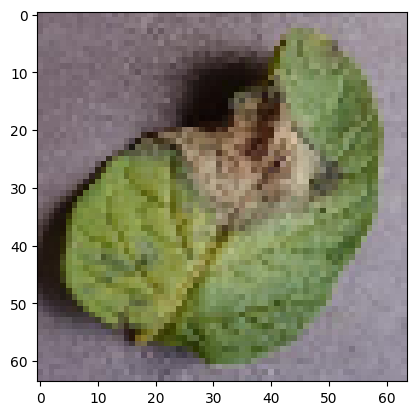

In [28]:
data = input('Enter the name of the image : ')
img = cv.imread(data)
img = cv.resize(img, [64, 64])
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img, cmap=plt.cm.binary)
prediction = cnn.predict(np.array([img]) / 255)
index = np.argmax(prediction)
print(f'Prediction is {class_names[index]}')